Базы данных можно разделить на два вида:

- Реляционные. В таких БД данные хранятся в виде связанных таблиц. В этом курсе мы сфокусируемся именно на реляционных БД.
- Нереляционные. Такие БД имеют специфическую структуру: например, данные хранятся в формате ключ-значение или в виде дерева.

Операторы SQL делятся на:

- операторы определения данных (Data Definition Language, DDL) — с их помощью создаются и изменяются объекты в БД (сама БД, таблицы, функции, процедуры, пользователи и т. д.);
- операторы манипуляции данными (Data Manipulation Language, DML) — с их помощью проводятся манипуляции с данными в таблицах;
- операторы определения доступа к данным (Data Control Language, DCL) — с их помощью, как следует из названия, создаются и изменяются разрешения на определённые операции с объектами в БД;
- операторы управления транзакциями (Transaction Control Language, TCL) — с их помощью осуществляется комплекс определённых действий, причём так, что либо все эти действия выполняются успешно, либо ни одно из них не выполняется вообще.

Попробуйте в Metabase!

```SELECT *```  
```FROM sql.kinopoisk```

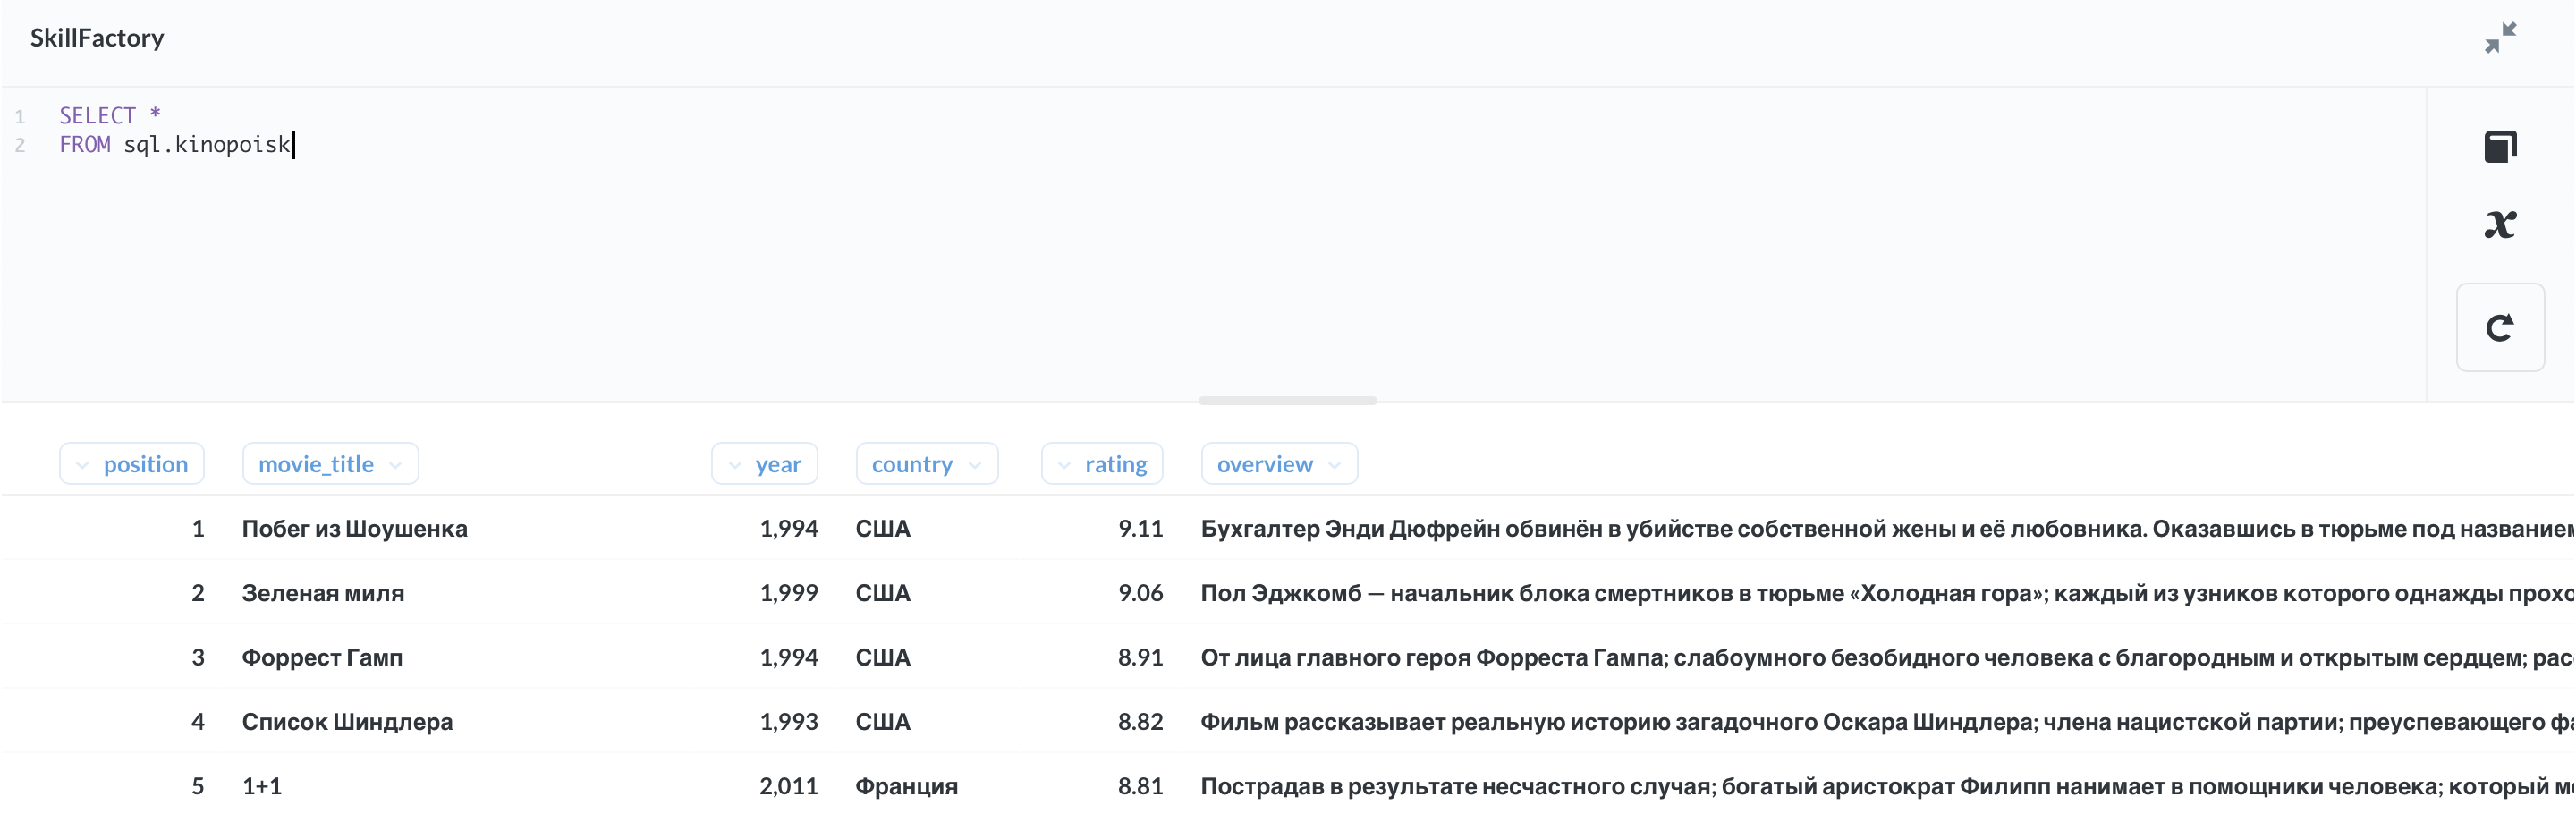

→ Оператор SELECT сообщает СУБД, что вы хотите извлечь из неё данные. SELECT лежит в основе любого SQL-запроса к БД.

→ FROM sql.kinopoisk сообщает, из какой таблицы извлекаются данные. Сначала указывается название схемы, в которой содержится таблица (в нашем случае — это sql), а после точки — название самой таблицы (kinopoisk).

→ Звёздочка * указывает, что вы хотите видеть все столбцы этой таблицы.

Если же вам нужны не все столбцы, а только некоторые, вместо звёздочки перечислите названия всех интересующих вас столбцов через запятую.

Важно! SQL нечувствителен к регистру, поэтому ключевые слова можно писать хоть строчными, хоть прописными буквами: SELECT, select или SeLeCt.

In [ ]:
SELECT
    director,
    movie_title,
    10 - rating AS difference
FROM sql.kinopoisk

Для этого используем ключевое слово AS и поставим после него новое имя difference. Можем повторить этот процесс для каждого столбца.

Новое имя является просто псевдонимом, или алиасом, — оно временное и не меняет реального имени столбца в базе данных. Алиас влияет только на то, как столбец отображается в выводе конкретного запроса.

Алиасом может быть как одно слово, так и несколько, а его написание — как латиницей, так и кириллицей.

Обратите внимание! Если в алиасе используются пробелы, необходимо заключать весь псевдоним в двойные кавычки, например, movie_title AS "Movie Title".

Мы уже знаем, что делать, если нам нужны лишь несколько столбцов из таблицы.

Но как быть, если мы хотим видеть не все строки, а только некоторые из них?

В таком случае нам пригодится ключевое слово WHERE.

In [ ]:
SELECT * /*выбор всех столбцов*/
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/
WHERE position = 1 /*с позицией 1*/

In [ ]:
SELECT /*выбор всех полей*/
    position, /*столбец position*/
    movie_title, /*столбец movie_title*/
    year, /*столбец year*/
    director /*столбец director*/
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/
WHERE year < 1984 /*при условии, что год создания меньше 1984*/

Допустим, одного условия нам мало.

В таком случае мы можем комбинировать их с помощью AND и OR.

In [ ]:
SELECT *
FROM sql.kinopoisk 
WHERE year >= 2000
AND rating >= 8

Теперь вы хотите получить информацию о фильмах, которые вышли между 1975 и 1985 годами включительно. Можно воспользоваться следующим запросом:

In [ ]:
SELECT *
FROM sql.kinopoisk
WHERE year >= 1975
    AND year <= 1985

Можем оптимизировать её, сделав более элегантной с помощью BETWEEN:

In [ ]:
SELECT *
FROM sql.kinopoisk
WHERE year BETWEEN 1975 AND 1985

В дополнение к другим операторам можно использовать ключевое слово NOT — оно «переворачивает» следующий за ним оператор.

In [ ]:
SELECT *
FROM sql.kinopoisk
WHERE year NOT BETWEEN 1965 AND 1980

In [ ]:
SELECT
    year,
    movie_title,
    director
FROM sql.kinopoisk
WHERE (rating > 8.5 AND year < 2000)
    OR year >= 2000

Ещё один полезный оператор для фильтрации строк — IN.

Конструкции с IN имеют следующий вид:

column IN (value1, value2, value3)

Эта запись аналогична следующей: column = value1 OR column = value2 OR column = value3 — но выглядит проще и компактнее.

Давайте получим информацию о всех фильмах Леонида Гайдая.

In [ ]:
SELECT *
FROM sql.kinopoisk
WHERE director = 'Леонид Гайдай'

Предположим, мы не знаем точно, какое текстовое значение ищем.

В таком случае нам поможет оператор LIKE.

Например, чтобы получить все фильмы, название которых начинается на А (кириллическую), мы воспользуемся таким запросом:

Также в текстовых строках используется знак подчёркивания (_) — он заменяет ровно один любой символ.

In [ ]:
SELECT *
FROM sql.kinopoisk
WHERE movie_title LIKE 'А%'

Для пустых значений есть специальное обозначение — NULL.

При этом вы не можете просто приравнять значение к NULL. Проверим это на следующем запросе:

In [ ]:
SELECT *
FROM sql.kinopoisk
WHERE overview IS NULL /*нельзя использовать оператор = */

Порядок вывода строк может задаваться в настройках базы данных для каждой таблицы. Более того, этот порядок может быть не задан, и тогда от вывода к выводу он будет разным.

Чтобы задать порядок вывода строк в запросе, применим новое ключевое слово ORDER BY.

In [ ]:
SELECT *
FROM sql.kinopoisk
ORDER BY movie_title ASC /*по возрастанию*/

Здесь ASC — явное указание порядка сортировки по возрастанию (англ. ascending).

Для обратного порядка используется ключевое слово DESC (англ. descending).

Разумеется, мы можем комбинировать в нашем запросе фильтрацию строк и сортировку вывода, а также выводить только необходимые столбцы.

In [ ]:
SELECT
    movie_title,
    director,
    screenwriter,
    year
FROM sql.kinopoisk
WHERE country = 'СССР'
ORDER BY rating DESC

Также в ORDER BY можно указывать, где должны идти пустые значения — в начале или в конце.

Такая настройка порядка вывода задаётся с помощью ключевых слов NULLS FIRST / NULLS LAST.

In [ ]:
SELECT
    movie_title,
    rating,
    overview,
    year
FROM sql.kinopoisk
ORDER BY overview NULLS FIRST

Вы можете сортировать вывод по нескольким столбцам, просто указав их через запятую в ORDER BY (порядок сортировки указывается отдельно для каждого столбца).

In [ ]:
SELECT
    director,
    movie_title
FROM sql.kinopoisk
ORDER BY year, rating DESC

Для упрощения работы с ORDER BY можно использовать не названия столбцов, а их номера из вывода.

In [ ]:
SELECT
    director,
    movie_title,
    year
FROM sql.kinopoisk
ORDER BY 1, 3 DESC

Ограничим вывод первыми десятью строками и сможем легко понять, какие данные хранятся в таблице, не утяжеляя результат.

In [ ]:
SELECT *
FROM sql.kinopoisk
LIMIT 10

In [ ]:
SELECT /*выбор*/
    movie_title, /*столбец movie_title*/
    rating /*столбец rating*/
FROM sql.kinopoisk /*из таблицы sql.kinopoisk*/
ORDER BY rating DESC /*сортировка по столбцу rating в порядке убывания*/
LIMIT 5 /*ограничить пятью значениями*/

Если LIMIT «оставляет» указанное число первых строк из вывода, то OFFSET, наоборот, «обрезает» указанное число первых строк.

LIMIT и OFFSET можно использовать вместе, их порядок не важен.

In [ ]:
SELECT
    movie_title,
    rating 
FROM sql.kinopoisk
ORDER BY rating DESC
OFFSET 3 LIMIT 5